/Users/slee/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


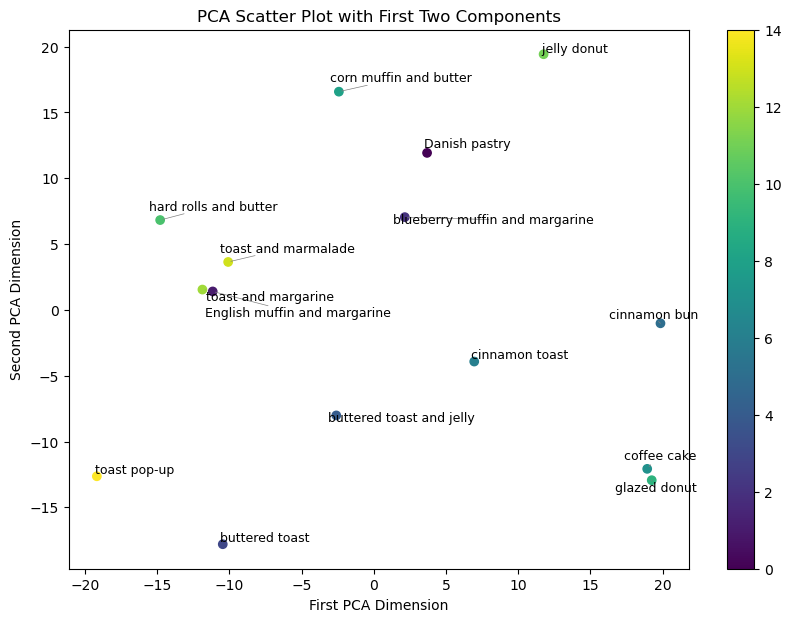

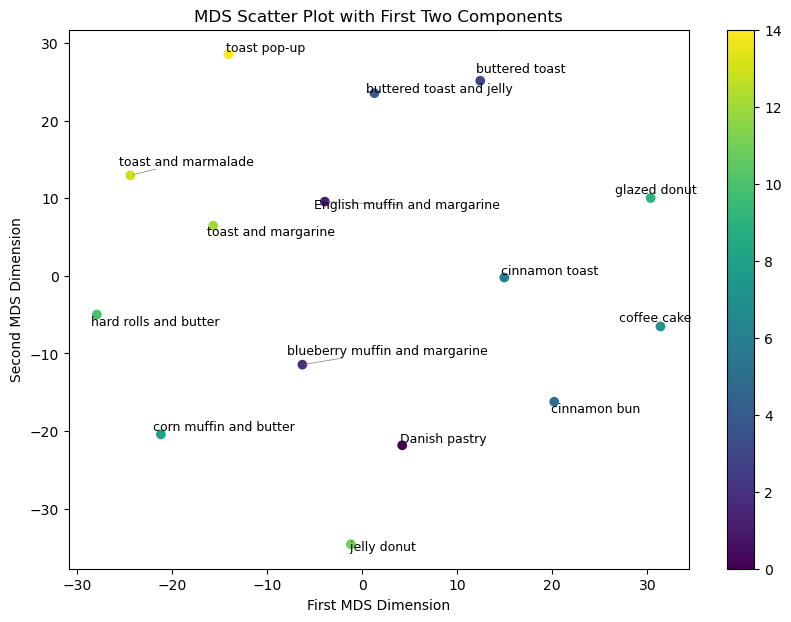

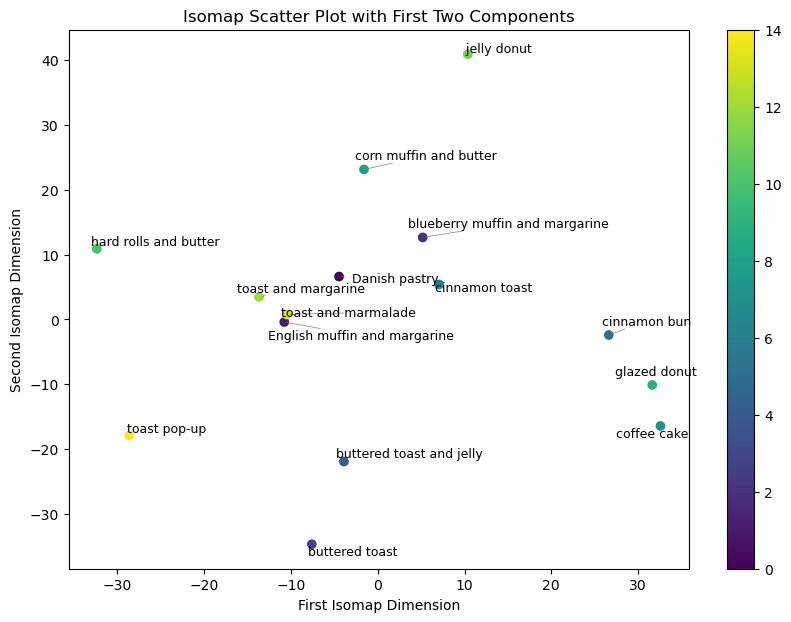

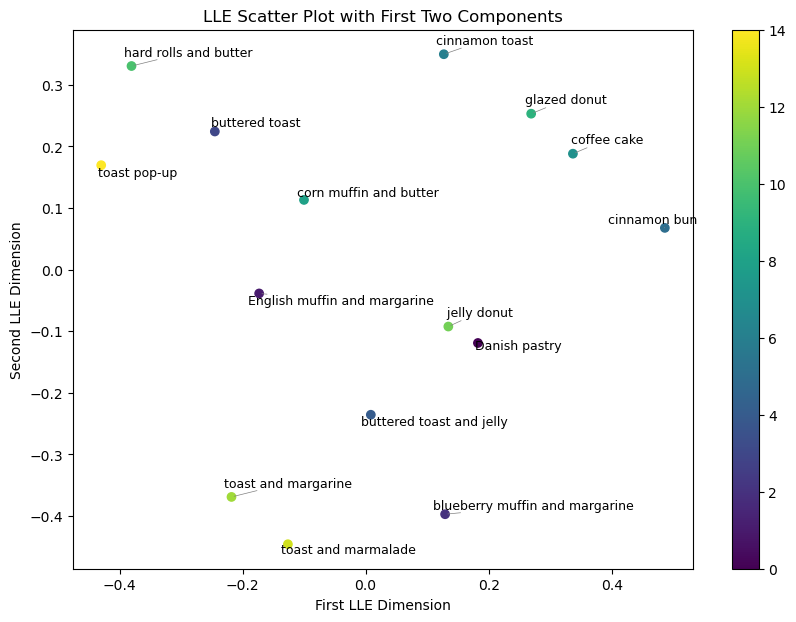

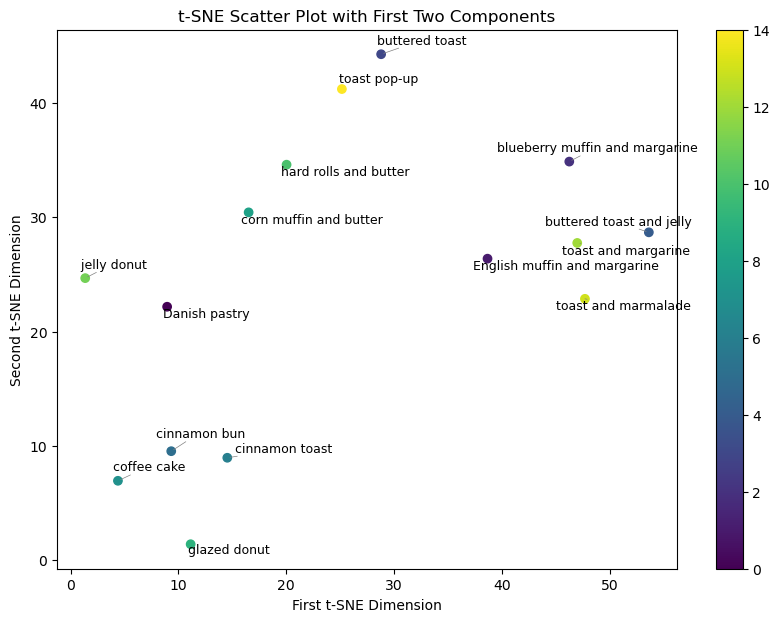

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.preprocessing import LabelEncoder
from adjustText import adjust_text  # Import the adjustText package

# Load dataset
data = pd.read_csv("Breakfast.csv")

# Assuming the first column is the label and the rest are features
y = data.iloc[:, 0]     # Labels (First column)
X = data.iloc[:, 1:]    # Features (Remaining columns)

# If the labels are categorical, convert them to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform dimensionality reduction techniques
pca_result = PCA(n_components=2).fit_transform(X)
mds_result = MDS(n_components=2, random_state=42).fit_transform(X)
isomap_result = Isomap(n_neighbors=10,n_components=2).fit_transform(X)
lle_result = LocallyLinearEmbedding(n_neighbors=10, n_components=2).fit_transform(X)
tsne_result = TSNE(n_components=2, perplexity=3, random_state=0).fit_transform(X)

# Function to create scatter plots with dynamically adjusted labels
def plot_scatter_with_adjusted_labels(data, method_name):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=y_encoded, cmap='viridis')
    plt.title(f'{method_name} Scatter Plot with First Two Components')
    plt.xlabel(f'First {method_name} Dimension')
    plt.ylabel(f'Second {method_name} Dimension')
    
    # Adding all labels, with adjustText for avoiding overlap
    texts = [plt.text(data[i, 0], data[i, 1], str(y.iloc[i]), fontsize=9) for i in range(len(y))]
    
    # Adjust the text labels to avoid overlaps
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    plt.colorbar(scatter)
    plt.show()

# Plot each method's result
plot_scatter_with_adjusted_labels(pca_result, 'PCA')
plot_scatter_with_adjusted_labels(mds_result, 'MDS')
plot_scatter_with_adjusted_labels(isomap_result, 'Isomap')
plot_scatter_with_adjusted_labels(lle_result, 'LLE')
plot_scatter_with_adjusted_labels(tsne_result, 't-SNE')
